<a href="https://colab.research.google.com/github/sandeep1847e/Phy654-data/blob/main/ML_assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Shape of x_train: (60000, 28, 28)


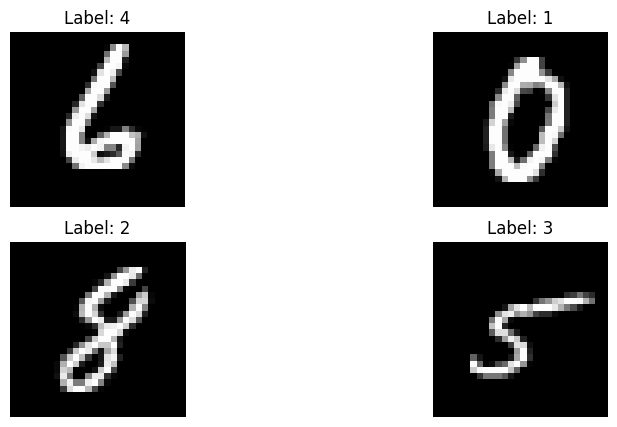

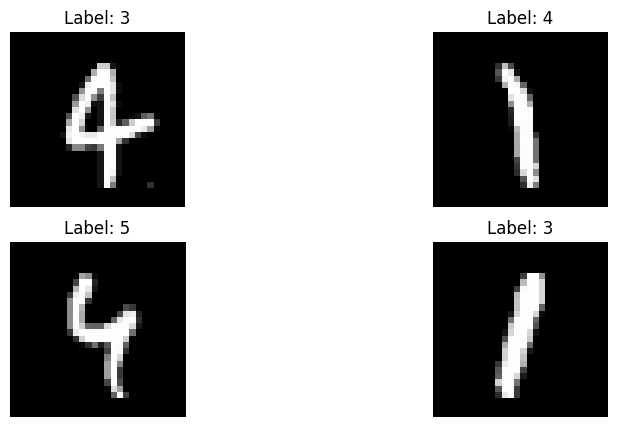

Number of training images: 60000
Number of testing images: 10000


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 13, 13, 8)           │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 6, 6, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 6, 6, 16)            │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 3, 3, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 4)             │              68 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │             370 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,686 (6.59 KB)

 Trainable params: 1,686 (6.59 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.6340 - loss: 1.0910 - val_accuracy: 0.9311 - val_loss: 0.2322
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9321 - loss: 0.2319 - val_accuracy: 0.9518 - val_loss: 0.1583
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9481 - loss: 0.1654 - val_accuracy: 0.9543 - val_loss: 0.1436
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9552 - loss: 0.1461 - val_accuracy: 0.9632 - val_loss: 0.1177
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9603 - loss: 0.1281 - val_accuracy: 0.9665 - val_loss: 0.1086
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9624 - loss: 0.1226 - val_accuracy: 0.9698 - val_loss: 0.0988
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9665 - loss: 0.1091 - val_accuracy: 0.9709 - val_loss: 0.0935
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9682 - loss: 0.1052 -

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, AveragePooling2D
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

# 1. Size of images and visualization
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print("Shape of x_train:", x_train.shape)  # (60000, 28, 28)

# Visualize 4 random images from training set
plt.figure(figsize=(10, 5))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(x_train[np.random.randint(len(x_train))], cmap='gray')
    plt.title(f"Label: {y_train[np.random.randint(len(x_train))]}")
    plt.axis('off')
plt.show()

# Visualize 4 random images from test set
plt.figure(figsize=(10, 5))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(x_test[np.random.randint(len(x_test))], cmap='gray')
    plt.title(f"Label: {y_test[np.random.randint(len(x_test))]}")
    plt.axis('off')
plt.show()

# 2. Number of images and preprocessing
print("Number of training images:", len(x_train))  # 60000
print("Number of testing images:", len(x_test))   # 10000

# Preprocessing: Reshape and normalize
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 3-8. CNN Model
model = Sequential([
    Conv2D(8, (3, 3), strides=(2, 2), activation='relu', input_shape=(28, 28, 1)),
    AveragePooling2D((2, 2)),
    Conv2D(16, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(4, (1, 1), activation='relu'),
    Flatten(),
    Dense(10, activation='softmax')
])

model.summary()

# 9. Compile and fit
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# 10. Evaluate on test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)